In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_profiling

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## import 

In [5]:
# %run import.ipynb
data_folder = 'data'

train = pd.read_csv('/'.join([data_folder, "data2.csv"]), sep = ';')

X = train.drop('cible1', axis = 1)
y = train.cible1

X_test = pd.read_csv('/'.join([data_folder, "test2.csv"]), sep = ';', index_col = 'id')

ids = X_test.index

def rename_X(X):
    return X.rename_axis({'Finess' : 'finess',
                           'Raison sociale' : 'raison_soc',
                           'Provenance des patients (département)' : 'provenance',
                           'Domaines d activités' : 'domain', 
                           'âge (deux classes >75 ans, <= 75 ans)' : 'age',
                           'Nombre de séjours/séances MCO des patients en ALD' : 'n_sejours_ald',
                           'Nombre total de séjours/séances' : 'n_sejours',
                           'annee' : 'annee'},
                          axis = 1)

X = rename_X(X)
X_test = rename_X(X_test)

df = pd.concat([X, X_test], axis=0)

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Target variable

In [6]:
y.describe()

count    1.879842e+06
mean     1.267647e-01
std      1.705479e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.660313e-01
max      1.000000e+00
Name: cible1, dtype: float64

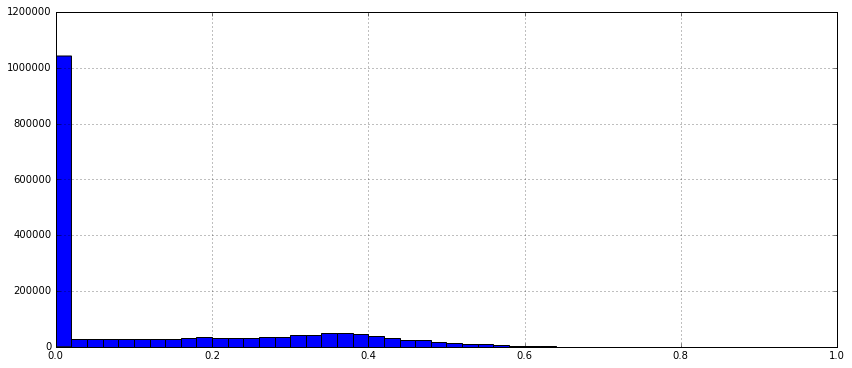

In [7]:
plt.figure(figsize = (14,6));
y.hist(bins = 50);

In [8]:
np.log(y).describe()

count    1.879842e+06
mean             -inf
std               NaN
min              -inf
25%              -inf
50%              -inf
75%     -1.324141e+00
max      0.000000e+00
Name: cible1, dtype: float64

## Features

In [9]:
df.shape
print(df.columns)
df.describe()

Index(['finess', 'raison_soc', 'provenance', 'domain', 'age', 'n_sejours_ald',
       'n_sejours', 'annee'],
      dtype='object')


,n_sejours_ald,n_sejours,annee
count,2.544366e+06,2.544366e+06,2.544366e+06
mean,2.939061e+01,7.465436e+01,2.011556e+03
std,4.594135e+02,6.359076e+02,2.306396e+00
min,0.000000e+00,1.000000e+00,2.008000e+03
25%,0.000000e+00,1.000000e+00,2.010000e+03
50%,0.000000e+00,2.000000e+00,2.012000e+03
75%,2.000000e+00,8.000000e+00,2.014000e+03
max,8.734300e+04,1.009720e+05,2.015000e+03


## `pandas_profiling`

In [10]:
%time rep = pandas_profiling.ProfileReport(df)
rep.to_file('pandas_profiling_report.html')

CPU times: user 3min 52s, sys: 6.94 s, total: 3min 59s
Wall time: 4min 1s
